In [1]:
# Name: Andy Chen
# Period: 4

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_openml

# fetch mnist data and separate into train and test sets
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [2]:
# do kmeans on PCA reduced data and store all necessary values
n = 100 # number of clusters
kmeans = KMeans(n_clusters=n, random_state=0, max_iter=1000)
kmeans.fit(X_train)

pred_labels = kmeans.predict(X_train)
all_labels = kmeans.labels_
centroids = kmeans.cluster_centers_


In [4]:
def freq_analysis(kmeans, actual_labels):
    freq_labels = {}
    for i in range(kmeans.n_clusters):
        labels = []
        index = np.where(kmeans.labels_ == i)
        labels.append(actual_labels[index])
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        if np.argmax(counts) in freq_labels:
            freq_labels[np.argmax(counts)].append(i)
        else:
            freq_labels[np.argmax(counts)] = [i]
    
    return freq_labels

def kmean_cluster_labels(X_labels, cluster_labels): # assign predicted labels
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
            
    return predicted_labels

cluster_labels = freq_analysis(kmeans, y_train.astype(np.uint8))
X_clusters = kmeans.predict(X_train)
predicted_labels = kmean_cluster_labels(X_clusters, cluster_labels)

print('Accuracy: {}\n'.format(metrics.accuracy_score(y_train.astype(np.uint8), predicted_labels)))


Accuracy: 0.8754666666666666



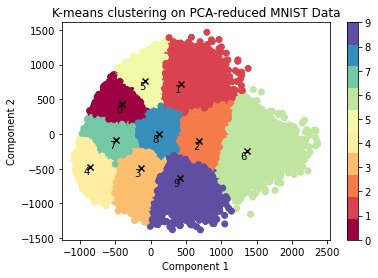

In [5]:
# plot centroids and points (this was just something i wanted to see on 10 clusters)
# not an image of my actual mnist clustering algorithm, which has 100 clusters

kmeans = KMeans(n_clusters=10, random_state=0, max_iter=1000)
reduced_data = PCA(n_components=2).fit_transform(X_train)
kmeans.fit(reduced_data)
pred_labels = kmeans.predict(reduced_data)
all_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

points = [reduced_data[:,0], reduced_data[:,1], pred_labels]

plt.title('K-means clustering on PCA-reduced MNIST Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(points[0], points[1], c=all_labels, cmap=cm.get_cmap('Spectral', 10))
plt.colorbar()
plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='x')
labels = ['{0}'.format(i) for i in range(10)]
for i in range (10):
    xy = (centroids[i, 0],centroids[i, 1])
    plt.annotate(labels[i], xy, horizontalalignment='right', verticalalignment='top')
plt.show()